## Conceptual

### Q1

**(a)** 
we would expect the performance of the flexible method to be better. With a small number of predictors in compariason to the sample size, we don't risk to overfit the training data. Thus we can allow more flexibility to reach a better performance

**(b)**  In this case it is better to go for an inflexibel method. A flexibel method will overfitt the training data, thus resulting in a poor performance of the estimator. We don't have enough observations to avoid overfitting

**(c)**
Flexibel methods are usually linear. In case of non linear relationship between the predictors and the response, it is better to use a flexibel method to model the relationship. While being careful not to over fit the training data. Indeed a high variance model affors a better fit to non-linear relationships

**(d)**
Inflexibel: a high bias model avoids overfitting to the noise in our dataset.

### Q2

**(a)** It is an inference problem, since we are interested in understanding the factors that affect a certain outcome and not the prediction.
* The predictors $p$ are: record profit, number of employees, industry and CEO slary (=4)   
* The number of observations $n$ = 500
* It is a regression problem


**(b)**

* A prediction problem
* Classification
* p = {price charged, marketing budget,  competition price, Success +  10 other variables}: 14
* n = 20

**(c)**

* predicition problem
* regression
* p = 4
* n = 52

### Q3

**(a)**

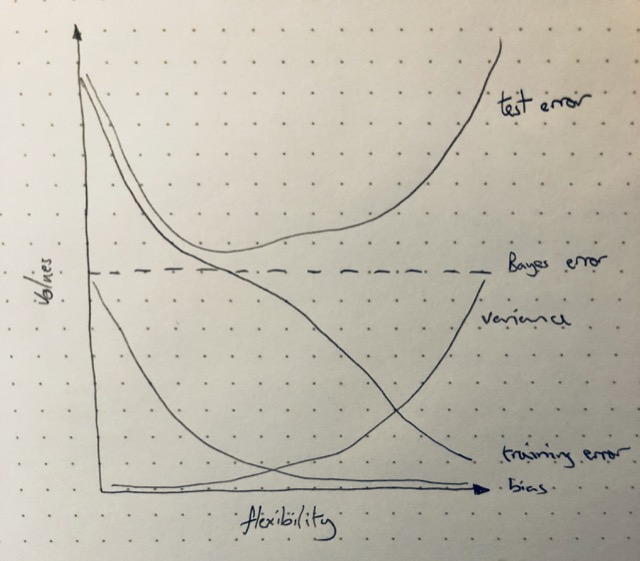

**(b)** 

* Bayes error: the irreducible error which is a constant ireespective of model flexibility
* Variance: the variance of a model increases with flexibility as the model picks up variation between training sets resulting in more variation in f(X)
* Bias: tends to decrease with flexibility, as the model can fit more complex relationships
* Test error: tends to decrease as reduced bias allows the model to better fit non-linear relationships but then increases as an increasingly flexibel model begins to fit the noise in the dataset (overfitting)
* Training error: decreases monotically with increased flexibility as the model 'flexes' towards individual datapoints in the training set.

### Q5

Less flexibel methods:

* (+) gives better results with few observations
* (+) simpler inference: the effect of each feature can be more easily understood
* (+) fewer parameters, faster optimisation
* (-) performs poorly if observations contain highly non-linear relationships

More flexibel methods:

* (+) gives better fit if observations contain no-linear relationships
* (-) can overfit the data providing poor predicitions for new observations

### Q6

A parametric approach simplifies the problem of estimating the best fit to the training data f(x) by making some assumptions about the functional form of f(x), this reduces the problem to estimating the parameters of the model. A non-parametric approach make no such assumptions and so f(x) can take any arbitrary shape.

The advantage of the parametric approach is that it simplifies the problem of estimating f(x) because it is easier to estimate paramters than an arbitrary function. The disadvantage of this approach is that the assumed form of the function f(X) could limit the degree of accuracy with which the model can fit the training data. If too many parameters are used, in an attempt to increase the models flexibility, then overfitting can occur – meaning that the model begins to fit noise in the training data that is not representive of unseen observations.

### Q7


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Disable jedi autocompleter
%config Completer.use_jedi = False

In [2]:
df = pd.DataFrame({'Obs': [1, 2, 3, 4, 5, 6],
                   'X1': [0, 2, 0, 0, -1, 1],
                   'X2': [3, 0, 1, 1, 0, -1],
                   'X3': [0, 0, 3, 2, 1, 1],
                   'Y': ['Red', 'Red', 'Red', 'Green', 'Green', 'Red']})

In [3]:
df

,Obs,X1,X2,X3,Y
0,1,0,3,0,Red
1,2,2,0,0,Red
2,3,0,1,3,Red
3,4,0,1,2,Green
4,5,-1,0,1,Green
5,6,1,-1,1,Red


In [4]:
Y = np.array([0, 0, 0])

**(a)** Euclidean distance between each observation for Y

In [5]:
d = np.sqrt(np.sum((df[['X1', 'X2', 'X3']]**2 - Y), axis=1))
df['d'] = d

In [6]:
df

,Obs,X1,X2,X3,Y,d
0,1,0,3,0,Red,3.000000
1,2,2,0,0,Red,2.000000
2,3,0,1,3,Red,3.162278
3,4,0,1,2,Green,2.236068
4,5,-1,0,1,Green,1.414214
5,6,1,-1,1,Red,1.732051


**(b)**

K = 1

In [7]:
df[df['d'] == df['d'].min()]['Y']

4    Green
Name: Y, dtype: object

Our prediction is Y = Green since it is the response value of the first nearest neighbour to the point X1 = X2 = X3 = 0

**(c)**

K = 3

In [8]:
df.sort_values('d')[0:3]

,Obs,X1,X2,X3,Y,d
4,5,-1,0,1,Green,1.414214
5,6,1,-1,1,Red,1.732051
1,2,2,0,0,Red,2.000000


Our prediction is 2/3 Red and 1/3 Green. Since we have 2 reds and one green.
Thus it is Red.

**(d)**

We expect K to be small. So is the prediction more flexibel and so more flexibel for non-linear problems

## Applied

### Q8

In [9]:
# a)
college = pd.read_csv('../data/College.csv')
college.sample(3)

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
691,University of Utah,No,5095,4491,2400,27,53,13894,8374,6857,3975,858,3093,89,93,12.8,9,9275,37
339,Manhattanville College,Yes,962,750,212,21,54,830,150,14700,6550,450,400,97,97,11.3,24,11291,70
80,Calvin College,Yes,1784,1512,913,29,56,3401,136,10230,3710,400,1210,75,81,14.8,41,7786,81


In [10]:
# b)
college.rename(columns={'Unnamed: 0': 'College'}, inplace=True)

In [11]:
college.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   College      777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

In [12]:
# c) i.
college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


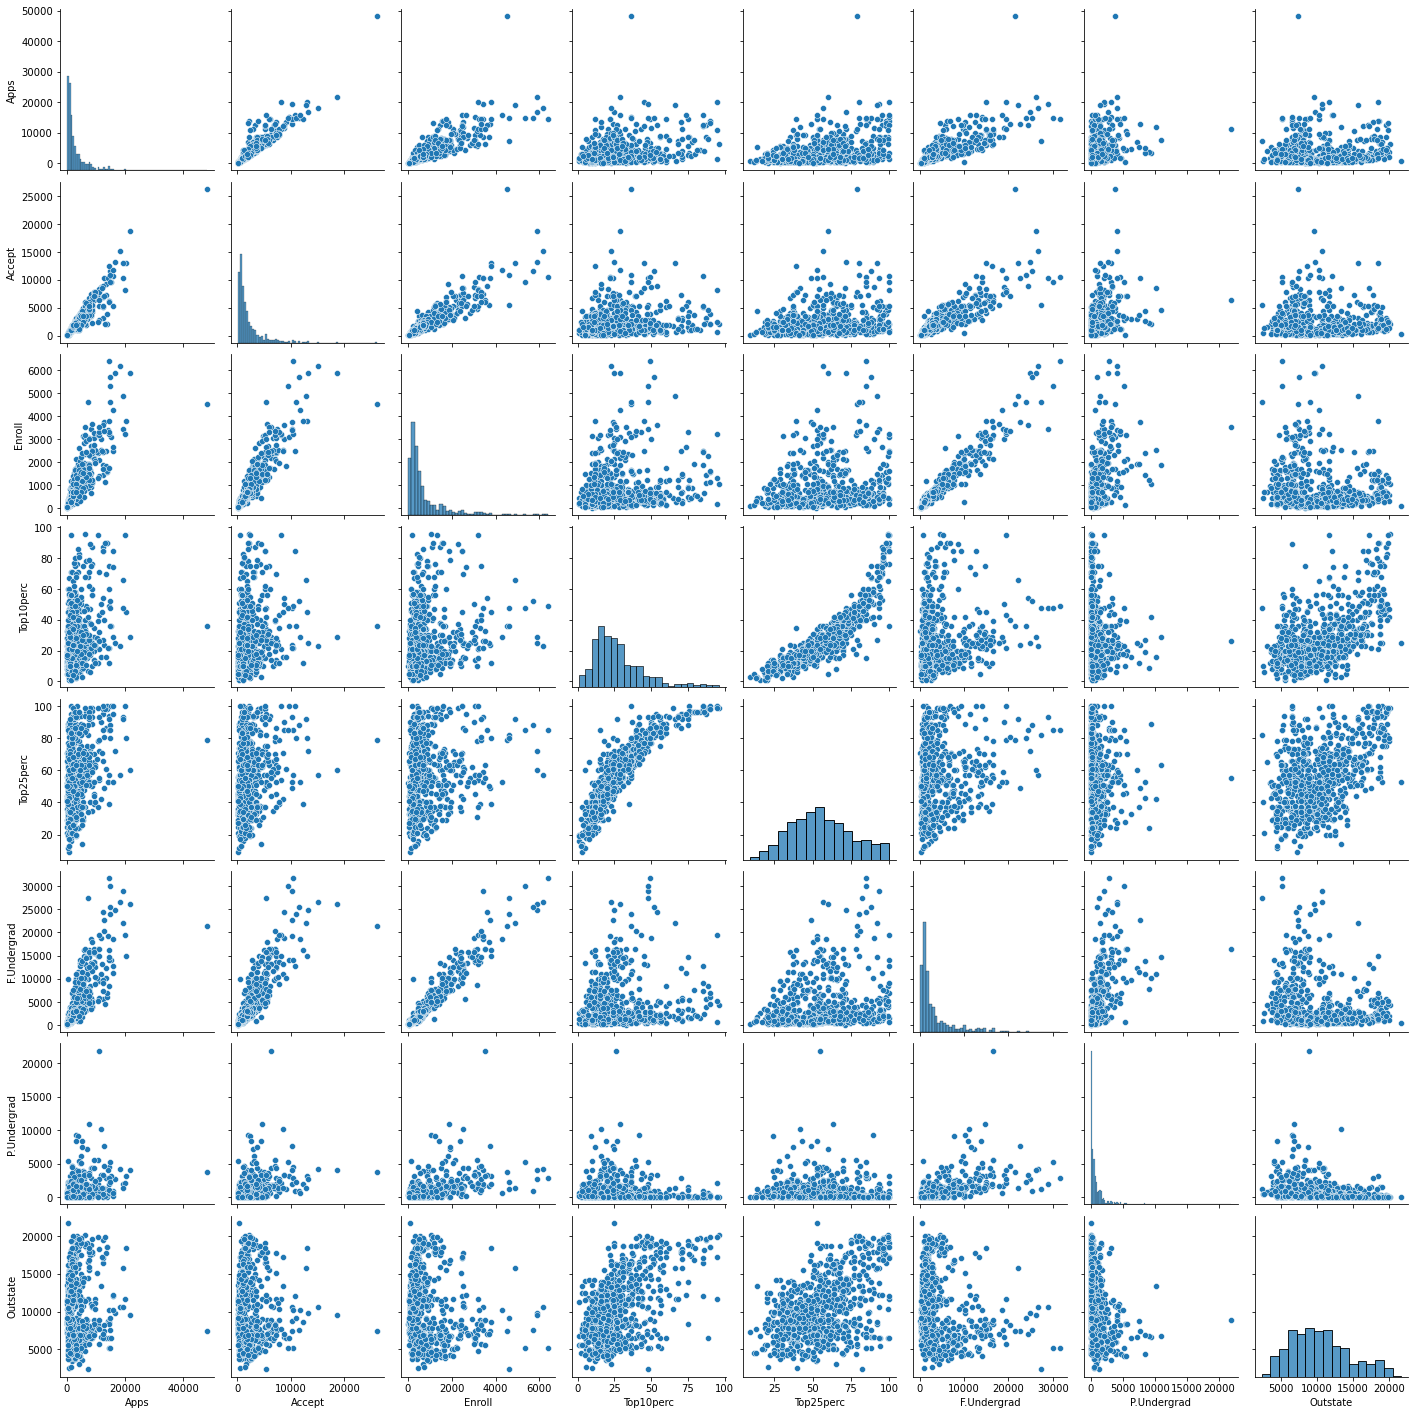

In [13]:
# c) ii.
sns.pairplot(college.iloc[:, :10])

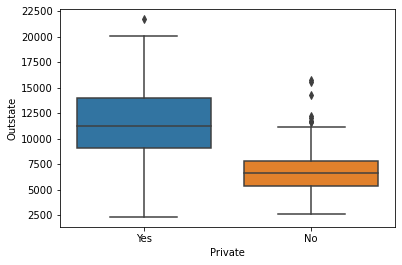

In [14]:
# c) iii.
sns.boxplot(data=college, x='Private', y='Outstate');

In [15]:
# c) iv
college['Top10perc'].value_counts()

20    37
10    35
12    32
16    31
15    28
      ..
66     1
89     1
65     1
54     1
96     1
Name: Top10perc, Length: 82, dtype: int64

In [16]:
# Next line produces No/Yes categories based on a boolean(0/1) and saves it as a Df column
college['Elite'] = pd.Categorical(np.where(college['Top10perc'] > 50, 'Yes', 'No'))
print(college['Elite'].value_counts())

No     699
Yes     78
Name: Elite, dtype: int64


<AxesSubplot:xlabel='Elite', ylabel='Outstate'>

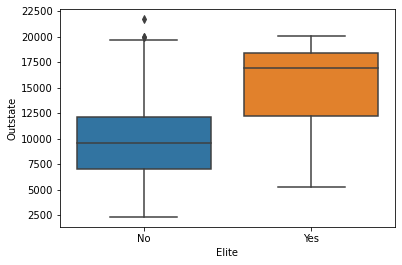

In [17]:
sns.boxplot(data=college, x='Elite', y='Outstate')

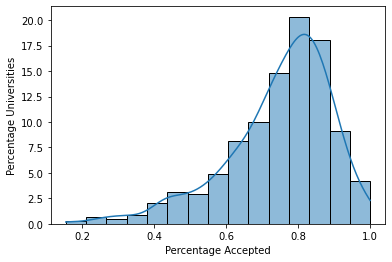

In [18]:
# c) v.
g = sns.histplot(college['Accept']/college['Apps'], stat='percent', kde=True, bins=15)
g.set(xlabel='Percentage Accepted', ylabel='Percentage Universities');

### Q9

In [19]:
# load the data
auto = pd.read_csv('../data/Auto.csv')
auto.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite


In [20]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [21]:
auto.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       94
weight          350
acceleration     95
year             13
origin            3
name            304
dtype: int64

In [22]:
auto.acceleration.value_counts()

14.5    23
15.5    21
16.0    16
14.0    16
13.5    15
        ..
17.1     1
24.6     1
23.5     1
16.1     1
15.6     1
Name: acceleration, Length: 95, dtype: int64

**a)** 
Quantitative predictors are: 

* mpg, horsepower, weight, displacement, acceleration

Qualitative predictors:

* cylinders, year, origin, name, cylinders

Thus let's conver horsepower to int:

In [23]:
auto['horsepower'] = pd.to_numeric(auto['horsepower'], errors='coerce')

**b)**

In [24]:
quant = ['mpg', 'horsepower', 'weight', 'displacement', 'acceleration']
for i in quant:
    print(f"Range of {i}: [{auto[i].min()}, {auto[i].max()}]")

Range of mpg: [9.0, 46.6]
Range of horsepower: [46.0, 230.0]
Range of weight: [1613, 5140]
Range of displacement: [68.0, 455.0]
Range of acceleration: [8.0, 24.8]


In [25]:
for i in quant:
    print(f'{i}: (std={np.round(auto[i].std(),2)}, mean={np.round(auto[i].mean(),2)})')

mpg: (std=7.83, mean=23.52)
horsepower: (std=38.49, mean=104.47)
weight: (std=847.9, mean=2970.26)
displacement: (std=104.38, mean=193.53)
acceleration: (std=2.75, mean=15.56)


In [26]:
auto[quant].describe(percentiles=[]).iloc[1:]

,mpg,horsepower,weight,displacement,acceleration
mean,23.515869,104.469388,2970.261965,193.532746,15.555668
std,7.825804,38.491160,847.904119,104.379583,2.749995
min,9.000000,46.000000,1613.000000,68.000000,8.000000
50%,23.000000,93.500000,2800.000000,146.000000,15.500000
max,46.600000,230.000000,5140.000000,455.000000,24.800000


**c)**

In [27]:
pd.concat((auto[quant].iloc[:10], auto[quant].iloc[85:])).describe(percentiles=[]).iloc[1:]


,mpg,horsepower,weight,displacement,acceleration
mean,24.409317,101.235849,2936.807453,187.680124,15.700621
std,7.913357,36.185088,810.987533,100.120925,2.706436
min,11.000000,46.000000,1649.000000,68.000000,8.500000
50%,23.900000,90.500000,2797.500000,145.500000,15.500000
max,46.600000,230.000000,4997.000000,455.000000,24.800000


<AxesSubplot:>

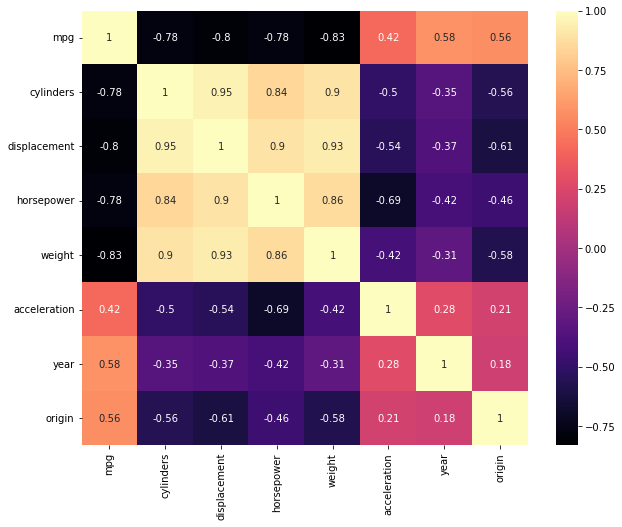

In [28]:
plt.rcParams["figure.figsize"] = 10,8
sns.heatmap(auto.corr(), annot=True, cmap='magma')

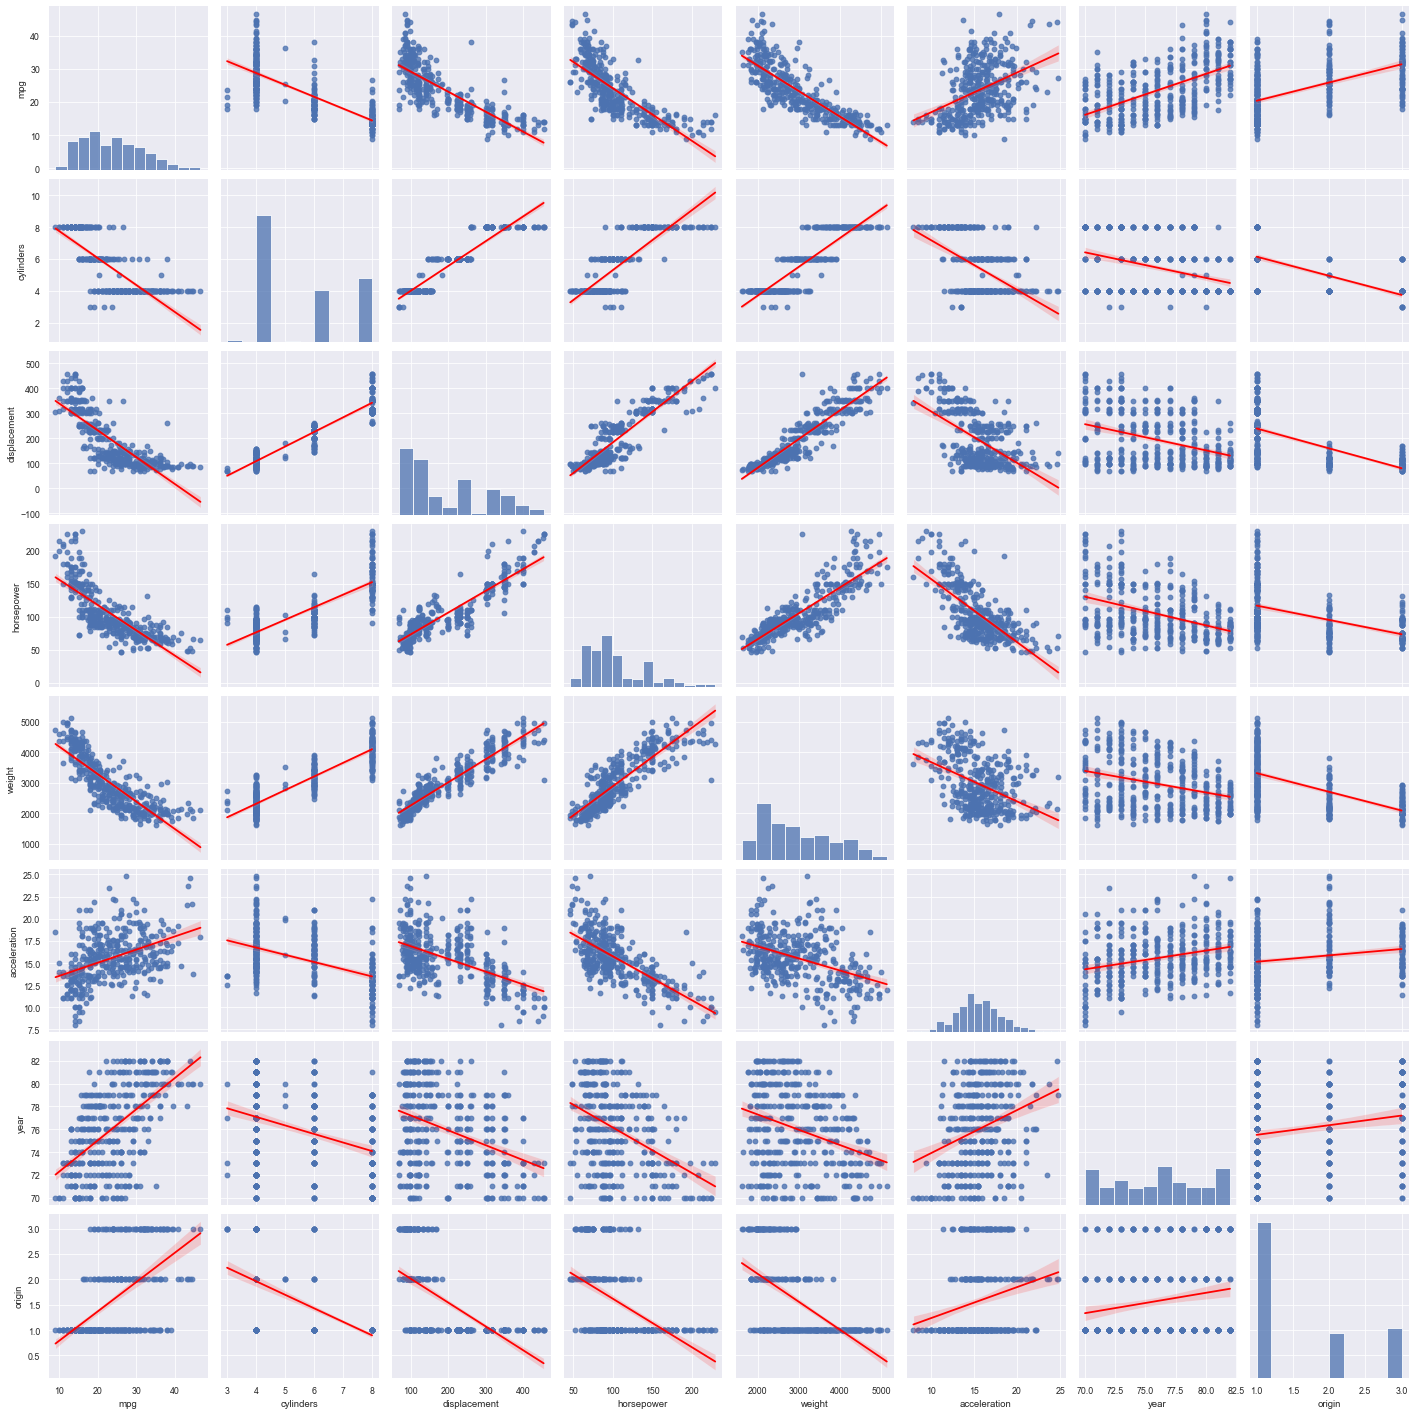

In [29]:
sns.set(context='paper', style='darkgrid')
g = sns.pairplot(auto, kind='reg', plot_kws={'line_kws':{'color':'red'}});
g.tight_layout()

**f)**  
from both figures it seems that mpg have some relationship with about all predictors

### Q10

In [30]:
boston = pd.read_csv('../data/boston.csv')
boston.sample(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
21,0.85204,0.0,8.14,0,0.538,5.965,89.2,4.0123,4,307,21.0,392.53,13.83,19.6
397,7.67202,0.0,18.10,0,0.693,5.747,98.9,1.6334,24,666,20.2,393.10,19.92,8.5
161,1.46336,0.0,19.58,0,0.605,7.489,90.8,1.9709,5,403,14.7,374.43,1.73,50.0
421,7.02259,0.0,18.10,0,0.718,6.006,95.3,1.8746,24,666,20.2,319.98,15.70,14.2
103,0.21161,0.0,8.56,0,0.520,6.137,87.4,2.7147,5,384,20.9,394.47,13.44,19.3


In [31]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [32]:
boston.shape

(506, 14)

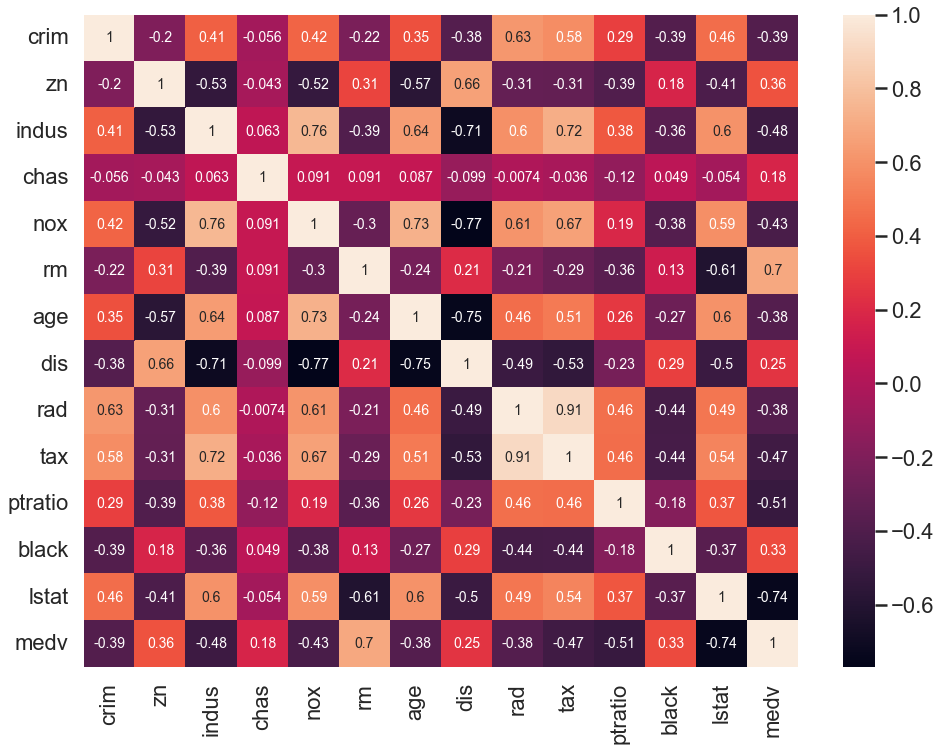

In [119]:
plt.rcParams["figure.figsize"] = 16,12
sns.set(context='poster')
g = sns.heatmap(boston.corr(), annot=True, annot_kws={'fontsize':'14'})

**c)**  
There are no very strong relationships (> .9) with crime. The highest two are rad and tax.  
>Crime is correlated with density of population (from what I've read before) so rad might be representative of how dense the population is if you are close to highways. Tax rates are generally higher the closer you are to a city center so higher tax rates might imply denser populations. And lower status (lstat) makes sense since more crime is committed by those less well off.

In [37]:
for i in boston.columns:
    print(f"Range of {i}: [{boston[i].min()}, {boston[i].max()}]")

Range of crim: [0.00632, 88.9762]
Range of zn: [0.0, 100.0]
Range of indus: [0.46, 27.74]
Range of chas: [0, 1]
Range of nox: [0.385, 0.871]
Range of rm: [3.5610000000000004, 8.78]
Range of age: [2.9, 100.0]
Range of dis: [1.1296, 12.1265]
Range of rad: [1, 24]
Range of tax: [187, 711]
Range of ptratio: [12.6, 22.0]
Range of black: [0.32, 396.9]
Range of lstat: [1.73, 37.97]
Range of medv: [5.0, 50.0]


In [38]:
boston.nunique()

crim       504
zn          26
indus       76
chas         2
nox         81
rm         446
age        356
dis        412
rad          9
tax         66
ptratio     46
black      357
lstat      455
medv       229
dtype: int64

(array([439.,  44.,  14.,   1.,   3.,   2.,   0.,   1.,   1.,   1.]),
 array([6.3200000e-03, 8.9033080e+00, 1.7800296e+01, 2.6697284e+01,
        3.5594272e+01, 4.4491260e+01, 5.3388248e+01, 6.2285236e+01,
        7.1182224e+01, 8.0079212e+01, 8.8976200e+01]),
 <BarContainer object of 10 artists>)

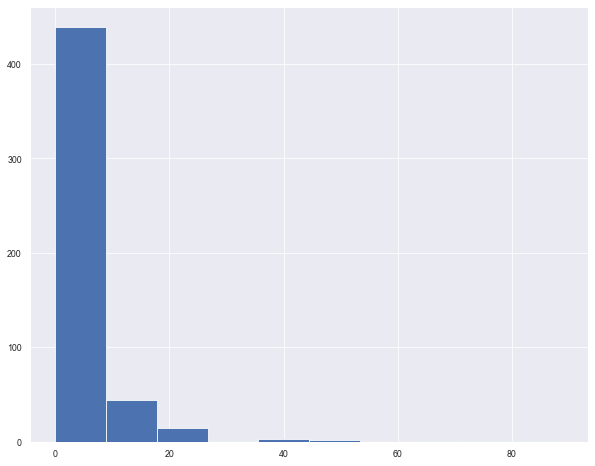

In [40]:
plt.hist(boston.crim);

In [41]:
# e)
boston['chas'].sum()

35

In [43]:
# f)
np.median(boston['ptratio'])

19.05

In [46]:
# h)
pd.DataFrame({'More than 8 rooms': boston[boston['rm'] > 8].describe().loc['50%'], 
              '8 or less rooms' : boston[boston['rm'] <= 8].describe().loc['50%']})

,More than 8 rooms,8 or less rooms
crim,0.52014,0.24522
zn,0.00000,0.00000
indus,6.20000,9.69000
chas,0.00000,0.00000
nox,0.50700,0.53800
rm,8.29700,6.18500
age,78.30000,77.30000
dis,2.89440,3.21570
rad,7.00000,5.00000
tax,307.00000,334.00000


Most of the predictors are  similar in both groups except crime and median value of homes - both about double for more than 8 rooms.